In [1]:
import pandas as pd
import numpy as np

# Load trader dataset
trader_df = pd.read_csv("trader_data_small.csv")

# Load fear-greed index dataset
fear_greed_df = pd.read_csv("fear_greed_index.csv")

trader_df.head(), fear_greed_df.head()


(   account symbol  execution_price    size  side                 time  \
 0  acc_103    BTC         61726.44  4.5277   BUY  2024-08-12 12:20:00   
 1  acc_180    ETH         67295.94  3.7010  SELL  2024-03-19 17:30:00   
 2   acc_93    BNB         32636.35  0.9644  SELL  2024-08-20 15:36:00   
 3   acc_15    ETH         61547.10  3.0727  SELL  2024-06-11 14:45:00   
 4  acc_107    BNB           459.65  2.1832   BUY  2024-09-25 14:16:00   
 
    start_position event  closedPnL  leverage  
 0           1.766  OPEN     245.63        15  
 1           1.360  OPEN     495.62         6  
 2          -0.982  OPEN     165.65        20  
 3           0.778  OPEN      -6.52         9  
 4          -1.921  OPEN     423.17         5  ,
     timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     1

In [4]:
trader_df['time'] = pd.to_datetime(trader_df['time'])

trader_df['date'] = trader_df['time'].dt.date

fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.date


In [6]:
fear_greed_df.rename(columns={"date": "date", "Classification": "sentiment"}, inplace=True)


In [11]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
trader_df.info()
fear_greed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   account          1000 non-null   object        
 1   symbol           1000 non-null   object        
 2   execution_price  1000 non-null   float64       
 3   size             1000 non-null   float64       
 4   side             1000 non-null   object        
 5   time             1000 non-null   datetime64[ns]
 6   start_position   1000 non-null   float64       
 7   event            1000 non-null   object        
 8   closedPnL        1000 non-null   float64       
 9   leverage         1000 non-null   int64         
 10  date             1000 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 86.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column      

In [8]:
merged_df = pd.merge(trader_df, fear_greed_df, on="date", how="left")

merged_df.head()


,account,symbol,execution_price,size,side,time,start_position,event,closedPnL,leverage,date,timestamp,value,classification
0,acc_103,BTC,61726.44,4.5277,BUY,2024-08-12 12:20:00,1.766,OPEN,245.63,15,2024-08-12,1.723441e+09,25.0,Fear
1,acc_180,ETH,67295.94,3.7010,SELL,2024-03-19 17:30:00,1.360,OPEN,495.62,6,2024-03-19,1.710826e+09,79.0,Extreme Greed
2,acc_93,BNB,32636.35,0.9644,SELL,2024-08-20 15:36:00,-0.982,OPEN,165.65,20,2024-08-20,1.724132e+09,30.0,Fear
3,acc_15,ETH,61547.10,3.0727,SELL,2024-06-11 14:45:00,0.778,OPEN,-6.52,9,2024-06-11,1.718084e+09,74.0,Greed
4,acc_107,BNB,459.65,2.1832,BUY,2024-09-25 14:16:00,-1.921,OPEN,423.17,5,2024-09-25,1.727242e+09,59.0,Greed


In [12]:
merged_df['classification'].value_counts()


,count
classification,
Greed,439
Extreme Greed,283
Fear,150
Neutral,120
Extreme Fear,4


In [13]:
merged_df.groupby('classification')['closedPnL'].mean()


,closedPnL
classification,
Extreme Fear,-78.615000
Extreme Greed,10.091802
Fear,-16.541733
Greed,-8.187449
Neutral,33.332750


In [14]:
merged_df.groupby('classification')['leverage'].median()


,leverage
classification,
Extreme Fear,17.5
Extreme Greed,16.0
Fear,15.5
Greed,16.0
Neutral,13.0


<Figure size 800x500 with 0 Axes>

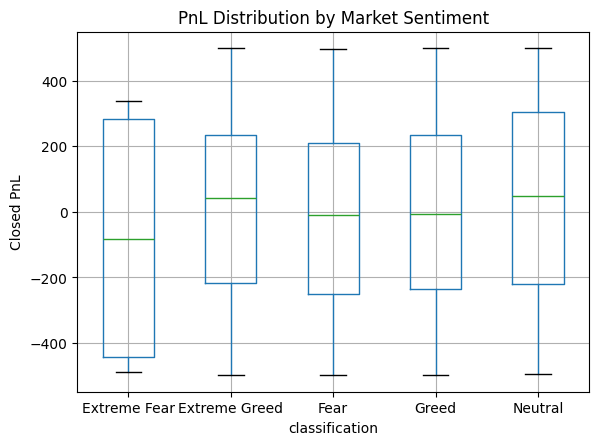

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
merged_df.boxplot(column='closedPnL', by='classification')
plt.title("PnL Distribution by Market Sentiment")
plt.suptitle("")
plt.xlabel("classification")
plt.ylabel("Closed PnL")
plt.show()


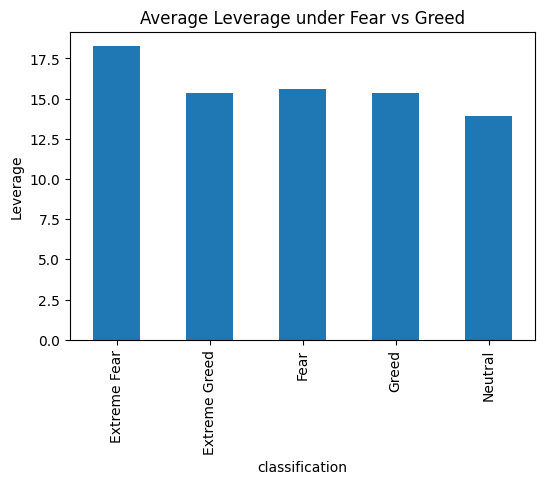

In [17]:
merged_df.groupby('classification')['leverage'].mean().plot(kind='bar', figsize=(6,4))

plt.title("Average Leverage under Fear vs Greed")
plt.ylabel("Leverage")
plt.xlabel("classification")
plt.show()


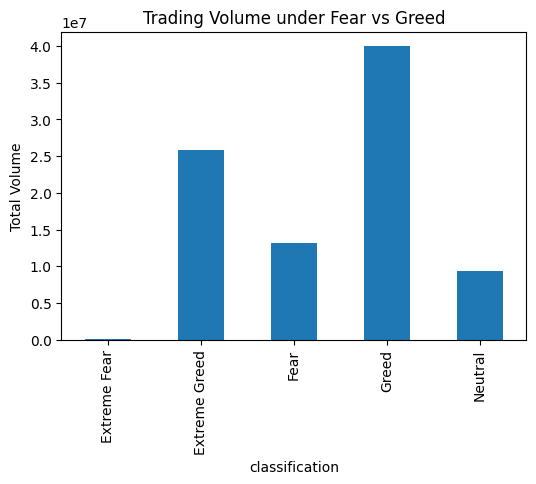

In [19]:
merged_df['trade_volume'] = merged_df['size'] * merged_df['execution_price']

merged_df.groupby('classification')['trade_volume'].sum().plot(kind='bar', figsize=(6,4))

plt.title("Trading Volume under Fear vs Greed")
plt.ylabel("Total Volume")
plt.xlabel("classification")
plt.show()


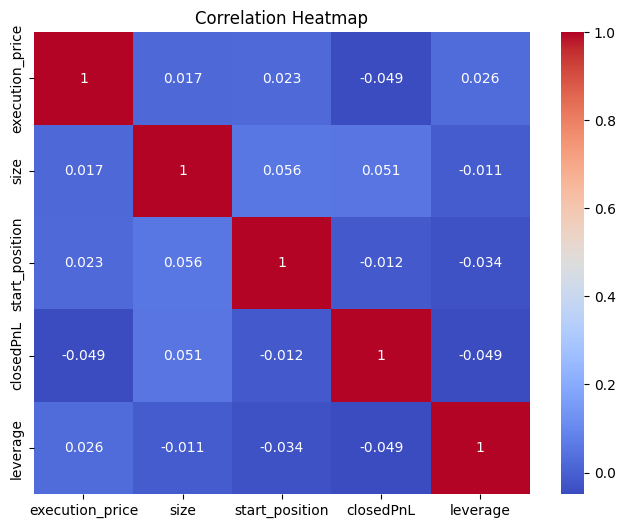

In [20]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(merged_df[['execution_price','size','start_position','closedPnL','leverage']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
